# Import Packages

In [4]:
import climlab
import numpy as np
import phys
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import DonutFunctions as df
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Import Calculated Heights file from Cluster

In [5]:
heights_calc_raw = xr.open_dataset('Data/Cluster/Combined_data_mois_case.nc')

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Data/'
ts_2m = xr.open_dataset(path + 'Cluster/ts_2m.nc', decode_times=False) # 2m Temperature dataset
temp = xr.open_dataset(path + 'Cluster/temp.nc', decode_times=False) # Air Temperature dataset

olr_raw = xr.open_dataset(path + 'NCEP Fluxes/csulf.ntat.mon.mean.nc')

olrs = df.regrid_3d(olr_raw.time.values,olr_raw.lon,olr_raw.lat,olr_raw.csulf.values,temp.lon,temp.lat)

lats = temp.lat.values
lons = temp.lon.values
lon_long = temp.lon.values

heights_calc = np.zeros((len(lats), len(lons)))
heights_calc, lons = add_cyclic_point(heights_calc, coord=lons)
lons = temp.lon.values

for i in range(len(lats)):
    for j in range(len(lons)):
        heights_calc[i,j] = heights_calc_raw.height.values[i,j]
        
months_olrs = []
for i in olr_raw.time.values:
    x = pd.to_datetime(i)
    months_olrs.append(x.month)

heights_calc[:,len(lons)] = heights_calc[:,0]
heights_calc = np.flip(heights_calc, axis=0)
lons = temp.lon.values

heights = np.zeros((len(lats), len(lons)))
heights, lon_long = add_cyclic_point(heights, coord=lon_long)
lons = temp.lon.values

C:\Users\richa\Anaconda3\lib\site-packages\cartopy\util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


In [6]:
df.update_progress(0)
for i in range(len(lats)):
    for j in range(len(lons)):
        
        month_list = np.arange(1,13)
        ts_monav = list(ts_2m.sel(lat=lats[i], lon=lons[j]).air.values)
        olr_monav = []
        
        for x in month_list:
            mask = np.array(months_olrs) == x
            olr_monav.append(np.mean(olrs[mask, i, j]))

        heights[i,j] = df.PolyArea(ts_monav,olr_monav) / (max(ts_monav) - min(ts_monav))
        
        df.update_progress(i/len(lats))
        print('Lat:', lats[i], 'Lon:', lons[j])
df.update_progress(1)

Progress: [####################] 100.0%


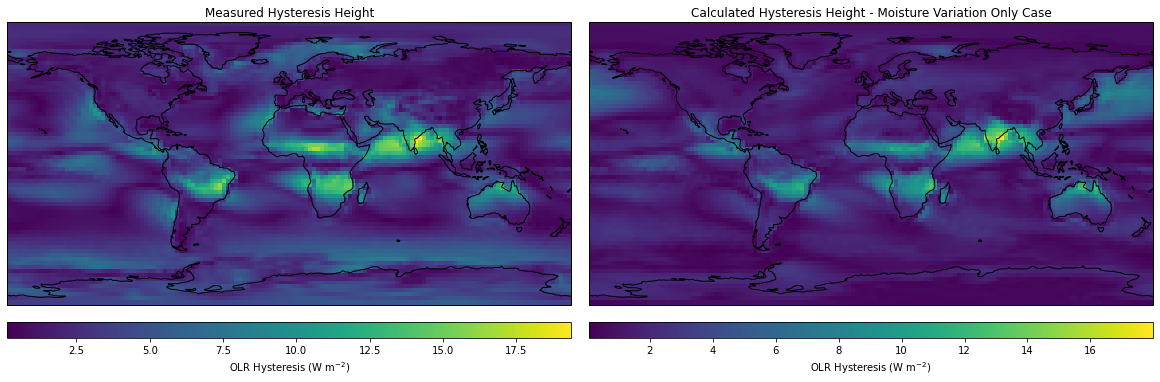

In [12]:
# --------------------------------
# Plotting the Reanalysis OLR Map
# --------------------------------

widths = [1,1]
fig = plt.figure(figsize=(16,9),constrained_layout=True)
gs = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths)    

ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax1.coastlines()
C1 = ax1.pcolor(lon_long, lats, heights, transform=ccrs.PlateCarree())
#if samescale:
#    C1.set_clim(vmin=0,vmax=maxheight)
ax1.set_title('Measured Hysteresis Height')
#ax1.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax1.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax1.xaxis.set_major_formatter(lon_formatter)
#ax1.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C1, ax=ax1, label='OLR Hysteresis (W m$^{-2}$)',fraction=0.3, orientation="horizontal")

# --------------------------------
# Plotting the Calculated OLR Map
# --------------------------------

ax2 = fig.add_subplot(gs[1], projection=ccrs.PlateCarree())
ax2.coastlines()
C2 = ax2.pcolor(lon_long, lats, heights_calc, transform=ccrs.PlateCarree())
#if samescale:
#    C2.set_clim(vmin=0,vmax=maxheight)
ax2.set_title('Calculated Hysteresis Height - Moisture Variation Only Case')
#ax2.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax2.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax2.xaxis.set_major_formatter(lon_formatter)
#ax2.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C2, ax=ax2, label='OLR Hysteresis (W m$^{-2}$)',fraction=0.3, orientation="horizontal")

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Figures/Cluster/'
plt.savefig(path + 'Calculated Hysteresis Mois Case.png', bbox_inches='tight')

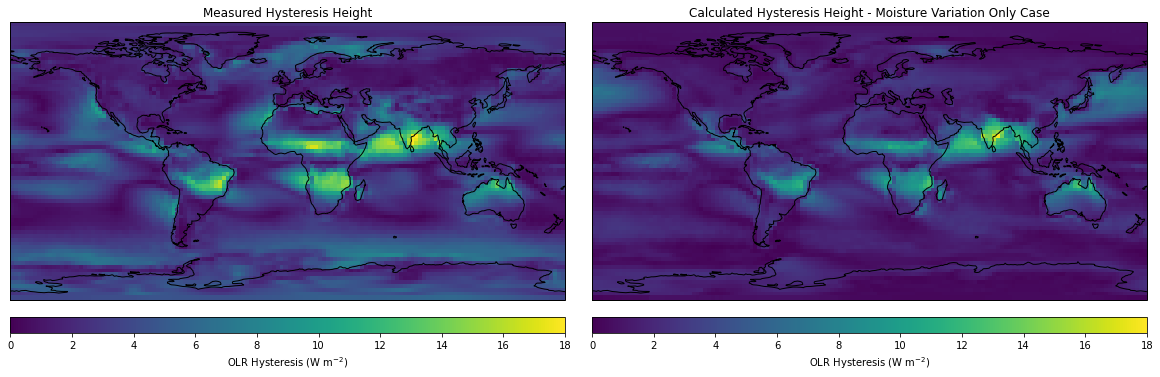

In [13]:
# --------------------------------
# Plotting the Reanalysis OLR Map
# --------------------------------

widths = [1,1]
fig = plt.figure(figsize=(16,9),constrained_layout=True)
gs = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths)    

maxheight = 18

ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax1.coastlines()
C1 = ax1.pcolor(lon_long, lats, heights, transform=ccrs.PlateCarree())
#if samescale:
C1.set_clim(vmin=0,vmax=maxheight)
ax1.set_title('Measured Hysteresis Height')
#ax1.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax1.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax1.xaxis.set_major_formatter(lon_formatter)
#ax1.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C1, ax=ax1, label='OLR Hysteresis (W m$^{-2}$)',fraction=0.3, orientation="horizontal")

# --------------------------------
# Plotting the Calculated OLR Map
# --------------------------------

ax2 = fig.add_subplot(gs[1], projection=ccrs.PlateCarree())
ax2.coastlines()
C2 = ax2.pcolor(lon_long, lats, heights_calc, transform=ccrs.PlateCarree())
#if samescale:
C2.set_clim(vmin=0,vmax=maxheight)
ax2.set_title('Calculated Hysteresis Height - Moisture Variation Only Case')
#ax2.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax2.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax2.xaxis.set_major_formatter(lon_formatter)
#ax2.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C2, ax=ax2, label='OLR Hysteresis (W m$^{-2}$)',fraction=0.3, orientation="horizontal")

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Figures/Cluster/'
plt.savefig(path + 'Calculated Hysteresis Mois Case same scale.png', bbox_inches='tight')

# Final For Thesis

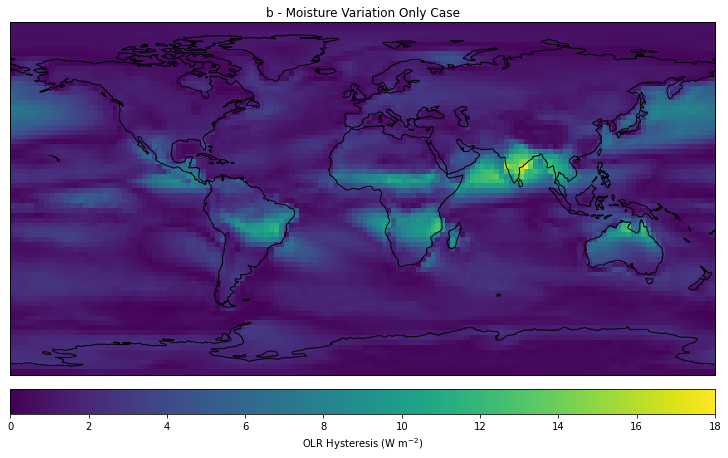

In [8]:
# --------------------------------
# Plotting the Reanalysis OLR Map
# --------------------------------

widths = [1]
fig = plt.figure(figsize=(10,7),constrained_layout=True)
gs = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths)    

maxheight = 18

ax2 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax2.coastlines()
C2 = ax2.pcolor(lon_long, lats, heights_calc, transform=ccrs.PlateCarree())
#if samescale:
C2.set_clim(vmin=0,vmax=maxheight)
ax2.set_title('b - Moisture Variation Only Case')
#ax2.set_xticks([lon_min, lon_min*0.5+lon_max*0.5, lon_max], crs=ccrs.PlateCarree())
#ax2.set_yticks([lat_min, lat_min*0.5+lat_max*0.5, lat_max], crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax2.xaxis.set_major_formatter(lon_formatter)
#ax2.yaxis.set_major_formatter(lat_formatter)
fig.colorbar(C2, ax=ax2, label='OLR Hysteresis (W m$^{-2}$)',fraction=0.3, orientation="horizontal")

path = '/Users/richa/OneDrive - Imperial College London/Documents/MIT/Project/Python/Figures/'
plt.savefig(path + 'Moisture case.png', bbox_inches='tight')